In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/07_Jul.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,27.000000,88.000000,1,7,0,2778.0,2758.0,2777.0,2320.0,2364.0,2761.0,2777.166667,2830.0
1,27.000000,88.333333,1,7,0,2765.0,2759.0,2761.0,2326.0,2340.0,2731.0,2780.500000,2801.0
2,27.000000,88.666667,1,7,0,2794.0,2748.0,2787.0,2322.0,2347.0,2709.0,2782.416667,2810.0
3,27.000000,89.000000,1,7,0,2815.0,2769.0,2762.0,2293.0,2342.0,2695.0,2783.500000,2775.0
4,27.000000,89.333333,2,7,0,2830.0,2778.0,2758.0,2280.0,2326.0,2723.0,2783.833333,2762.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,30.182451,81.141470,23,3,1,3767.0,3695.0,3605.0,3638.0,3110.0,3235.0,3709.500000,3804.0
8828,30.182451,81.141470,24,3,1,3767.0,3669.0,3626.0,3658.0,3123.0,3225.0,3720.500000,3758.0
8829,30.182451,81.141470,24,3,1,3760.0,3690.0,3608.0,3653.0,3115.0,3253.0,3728.416667,3703.0
8830,30.272451,81.141470,24,3,1,3789.0,3713.0,3626.0,3633.0,3178.0,3257.0,3741.000000,3777.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8832 non-null   float64
 1   Hum     8832 non-null   float64
 2   A       8832 non-null   int64  
 3   B       8832 non-null   int64  
 4   C       8832 non-null   int64  
 5   D       8832 non-null   float64
 6   E       8832 non-null   float64
 7   F       8832 non-null   float64
 8   G       8832 non-null   float64
 9   H       8832 non-null   float64
 10  I       8832 non-null   float64
 11  J       8832 non-null   float64
 12  Cons    8832 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 897.1 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8832 non-null   float64
 1   Hum     8832 non-null   float64
 2   A       8832 non-null   float64
 3   B       8832 non-null   float64
 4   C       8832 non-null   float64
 5   D       8832 non-null   float64
 6   E       8832 non-null   float64
 7   F       8832 non-null   float64
 8   G       8832 non-null   float64
 9   H       8832 non-null   float64
 10  I       8832 non-null   float64
 11  J       8832 non-null   float64
 12  Cons    8832 non-null   float64
dtypes: float64(13)
memory usage: 897.1 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 4992][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.176809,-1.375988,1.265240,-1.660699,1.484366,-1.373971,-1.318088,-1.369817,-1.314181,-2.380970,-2.027975,-0.945477,-1.374702
1,-1.257149,-1.375988,1.292633,-1.660699,1.484366,-1.373971,-1.354087,-1.367050,-1.358415,-2.365267,-2.086388,-1.015307,-1.365086
2,-1.232216,-1.375988,1.320027,-1.660699,1.484366,-1.373971,-1.273782,-1.397482,-1.286534,-2.375736,-2.069351,-1.066515,-1.359556
3,-1.329179,-1.375988,1.347420,-1.660699,1.484366,-1.373971,-1.215630,-1.339384,-1.355650,-2.451636,-2.081520,-1.099103,-1.356431
4,-1.365194,-1.375988,1.374813,-1.516262,1.484366,-1.373971,-1.174093,-1.314485,-1.366709,-2.485660,-2.120463,-1.033928,-1.355469


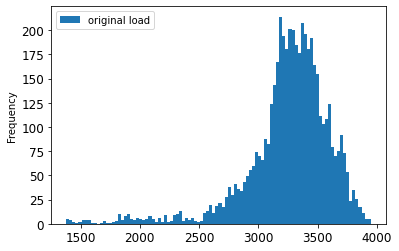

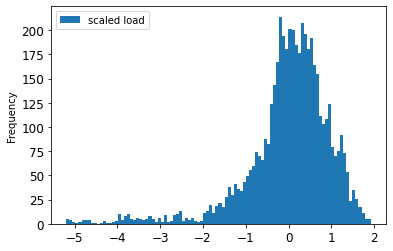

In [8]:
stlf_data[stlf_data.index <= 4992][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4992][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

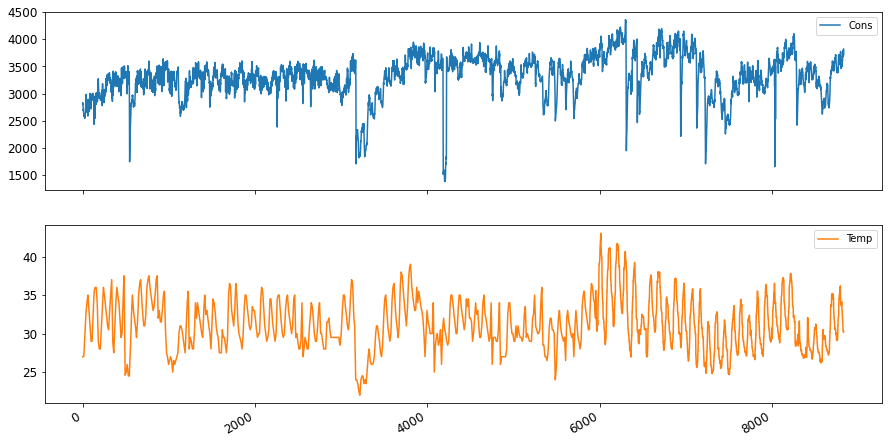

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-1.176809,-1.375988,1.265240,-1.660699,1.484366,-1.373971,-1.318088,-1.369817,-1.314181,-2.380970,-2.027975,-0.945477,-1.374702,-1.257149
1,-1.257149,-1.375988,1.292633,-1.660699,1.484366,-1.373971,-1.354087,-1.367050,-1.358415,-2.365267,-2.086388,-1.015307,-1.365086,-1.232216
2,-1.232216,-1.375988,1.320027,-1.660699,1.484366,-1.373971,-1.273782,-1.397482,-1.286534,-2.375736,-2.069351,-1.066515,-1.359556,-1.329179
3,-1.329179,-1.375988,1.347420,-1.660699,1.484366,-1.373971,-1.215630,-1.339384,-1.355650,-2.451636,-2.081520,-1.099103,-1.356431,-1.365194
4,-1.365194,-1.375988,1.374813,-1.516262,1.484366,-1.373971,-1.174093,-1.314485,-1.366709,-2.485660,-2.120463,-1.033928,-1.355469,-1.395668
5,-1.395668,-1.375988,1.402207,-1.516262,1.484366,-1.373971,-1.254398,-1.350451,-1.363944,-2.496128,-2.200781,-1.178243,-1.357392,-1.567432
6,-1.567432,-1.375988,1.429600,-1.516262,1.484366,-1.373971,-1.229476,-1.270220,-1.394356,-2.530152,-2.152103,-1.215486,-1.371577,-1.512024
7,-1.512024,-1.375988,1.456993,-1.516262,1.484366,-1.373971,-1.326396,-1.212121,-1.336298,-2.517066,-2.159405,-1.296954,-1.386002,-1.570202
8,-1.570202,-1.375988,1.484387,-1.371824,1.484366,-1.373971,-1.362395,-1.170623,-1.311416,-2.572028,-2.154537,-1.436613,-1.407639,-1.584054
9,-1.584054,-1.375988,1.511780,-1.371824,1.484366,-1.373971,-1.392855,-1.250854,-1.347357,-2.598200,-2.205649,-1.720588,-1.427353,-1.631150


In [11]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4983,0.615625,-0.386158,0.44344,1.372490,1.484366,-1.373971,0.814154,0.635955,0.695719,-0.051637,0.895140,1.198299,0.701033,0.626707
4984,0.626707,-0.386158,0.44344,1.516927,1.484366,-1.373971,0.769847,0.691286,0.598957,-0.051637,0.865933,1.205282,0.703918,0.576840
4985,0.576840,-0.386158,0.44344,1.516927,1.484366,-1.373971,0.686773,0.677453,0.435842,-0.056872,0.941384,1.195971,0.716660,0.488188
4986,0.488188,-0.386158,0.44344,1.516927,1.484366,-1.373971,0.650774,0.857281,0.645956,-0.062106,1.024136,1.254163,0.703437,0.538054
4987,0.538054,-0.386158,0.44344,1.516927,1.484366,-1.373971,0.617544,0.815782,0.637662,-0.064724,1.133662,1.284422,0.695263,0.560217
4988,0.560217,-0.386158,0.44344,1.661365,1.484366,-1.373971,0.628621,0.771517,0.692955,-0.046403,1.048475,1.240197,0.684204,0.715359
4989,0.715359,-0.386158,0.44344,1.661365,1.484366,-1.373971,0.578776,0.688520,0.679131,0.045200,1.175038,1.389167,0.687810,1.075508
4990,1.075508,-0.386158,0.44344,1.661365,1.484366,-1.373971,0.490164,0.652554,0.858834,0.333095,1.454937,1.600984,0.707043,0.718129
4991,0.718129,-0.386158,0.44344,1.661365,1.484366,-1.373971,0.540008,0.619355,0.817364,0.508449,1.620442,1.654520,0.698869,0.662721
4992,0.662721,-0.386158,0.44344,-1.660699,-1.446215,-1.373971,0.562161,0.630421,0.773130,0.505832,1.652082,1.587018,0.689734,NaN


In [12]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.interpolate()

In [13]:
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4983,0.615625,-0.386158,0.44344,1.372490,1.484366,-1.373971,0.814154,0.635955,0.695719,-0.051637,0.895140,1.198299,0.701033,0.626707
4984,0.626707,-0.386158,0.44344,1.516927,1.484366,-1.373971,0.769847,0.691286,0.598957,-0.051637,0.865933,1.205282,0.703918,0.576840
4985,0.576840,-0.386158,0.44344,1.516927,1.484366,-1.373971,0.686773,0.677453,0.435842,-0.056872,0.941384,1.195971,0.716660,0.488188
4986,0.488188,-0.386158,0.44344,1.516927,1.484366,-1.373971,0.650774,0.857281,0.645956,-0.062106,1.024136,1.254163,0.703437,0.538054
4987,0.538054,-0.386158,0.44344,1.516927,1.484366,-1.373971,0.617544,0.815782,0.637662,-0.064724,1.133662,1.284422,0.695263,0.560217
4988,0.560217,-0.386158,0.44344,1.661365,1.484366,-1.373971,0.628621,0.771517,0.692955,-0.046403,1.048475,1.240197,0.684204,0.715359
4989,0.715359,-0.386158,0.44344,1.661365,1.484366,-1.373971,0.578776,0.688520,0.679131,0.045200,1.175038,1.389167,0.687810,1.075508
4990,1.075508,-0.386158,0.44344,1.661365,1.484366,-1.373971,0.490164,0.652554,0.858834,0.333095,1.454937,1.600984,0.707043,0.718129
4991,0.718129,-0.386158,0.44344,1.661365,1.484366,-1.373971,0.540008,0.619355,0.817364,0.508449,1.620442,1.654520,0.698869,0.662721
4992,0.662721,-0.386158,0.44344,-1.660699,-1.446215,-1.373971,0.562161,0.630421,0.773130,0.505832,1.652082,1.587018,0.689734,0.662721


In [14]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
0,-1.257149
1,-1.232216
2,-1.329179
3,-1.365194
4,-1.395668
...,...
4988,0.715359
4989,1.075508
4990,0.718129
4991,0.662721


In [15]:
X_train = train_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.176809,-1.375988,1.265240,-1.660699,1.484366,-1.373971,-1.318088,-1.369817,-1.314181,-2.380970,-2.027975,-0.945477,-1.374702
1,-1.257149,-1.375988,1.292633,-1.660699,1.484366,-1.373971,-1.354087,-1.367050,-1.358415,-2.365267,-2.086388,-1.015307,-1.365086
2,-1.232216,-1.375988,1.320027,-1.660699,1.484366,-1.373971,-1.273782,-1.397482,-1.286534,-2.375736,-2.069351,-1.066515,-1.359556
3,-1.329179,-1.375988,1.347420,-1.660699,1.484366,-1.373971,-1.215630,-1.339384,-1.355650,-2.451636,-2.081520,-1.099103,-1.356431
4,-1.365194,-1.375988,1.374813,-1.516262,1.484366,-1.373971,-1.174093,-1.314485,-1.366709,-2.485660,-2.120463,-1.033928,-1.355469
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,0.560217,-0.386158,0.443440,1.661365,1.484366,-1.373971,0.628621,0.771517,0.692955,-0.046403,1.048475,1.240197,0.684204
4989,0.715359,-0.386158,0.443440,1.661365,1.484366,-1.373971,0.578776,0.688520,0.679131,0.045200,1.175038,1.389167,0.687810
4990,1.075508,-0.386158,0.443440,1.661365,1.484366,-1.373971,0.490164,0.652554,0.858834,0.333095,1.454937,1.600984,0.707043
4991,0.718129,-0.386158,0.443440,1.661365,1.484366,-1.373971,0.540008,0.619355,0.817364,0.508449,1.620442,1.654520,0.698869


In [16]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4993, 13, 1)

In [17]:
valid = stlf_data.copy()[(stlf_data.index >=5700) & (stlf_data.index <=6899)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5700,2637.0,27.000000,84.00000,10.0,1.0,0.0,2843.0,3123.0,3236.0,2981.0,3204.0,3293.0,2955.666667
5701,2568.0,27.333333,82.50000,10.0,1.0,0.0,2762.0,3103.0,3238.0,2822.0,3244.0,3298.0,2899.833333
5702,2540.0,27.666667,81.00000,10.0,1.0,0.0,2712.0,3055.0,3215.0,2725.0,3275.0,3343.0,2843.583333
5703,2570.0,28.000000,79.50000,10.0,1.0,0.0,2679.0,2930.0,3171.0,2703.0,3328.0,3358.0,2793.500000
5704,2594.0,28.333333,78.00000,11.0,1.0,0.0,2637.0,2843.0,3123.0,2722.0,3353.0,3380.0,2749.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,3857.0,34.262450,64.60792,20.0,4.0,1.0,3920.0,3999.0,4053.0,3762.0,3859.0,3469.0,3923.500000
6896,3894.0,34.262450,64.60792,21.0,4.0,1.0,3884.0,3977.0,4079.0,3750.0,3916.0,3481.0,3908.083333
6897,3883.0,34.262450,64.60792,21.0,4.0,1.0,3798.0,3955.0,3976.0,3731.0,3913.0,3435.0,3900.333333
6898,3909.0,34.107450,65.42362,21.0,4.0,1.0,3745.0,3935.0,3957.0,3724.0,3870.0,3578.0,3896.333333


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5700,-2.842488,-1.753346,1.571572,-0.382891,-1.34757,-1.564697,-2.228230,-1.431209,-1.106349,-1.615655,-0.977286,-0.777326,-2.030299
5701,-3.037387,-1.663386,1.470703,-0.382891,-1.34757,-1.564697,-2.454844,-1.486946,-1.100779,-2.047287,-0.867168,-0.762955,-2.196310
5702,-3.116477,-1.573426,1.369834,-0.382891,-1.34757,-1.564697,-2.594730,-1.620715,-1.164833,-2.310611,-0.781826,-0.633616,-2.363560
5703,-3.031738,-1.483466,1.268965,-0.382891,-1.34757,-1.564697,-2.687054,-1.969074,-1.287372,-2.370333,-0.635919,-0.590503,-2.512474
5704,-2.963947,-1.393506,1.168096,-0.236749,-1.34757,-1.564697,-2.804557,-2.211531,-1.421051,-2.318755,-0.567095,-0.527271,-2.643548
5705,-2.794469,-1.303546,1.067227,-0.236749,-1.34757,-1.564697,-2.997599,-2.437267,-1.476750,-2.169448,-0.492764,-0.484158,-2.754800
5706,-2.644763,-1.213586,0.966358,-0.236749,-1.34757,-1.564697,-3.075935,-2.576610,-1.610429,-1.976706,-0.302810,-0.331826,-2.841026
5707,-2.661711,-1.123626,0.865489,-0.236749,-1.34757,-1.564697,-2.992004,-2.668577,-1.958550,-1.840972,-0.286292,-0.280090,-2.897767
5708,-2.622166,-1.033666,0.764620,-0.090608,-1.34757,-1.564697,-2.924859,-2.785625,-2.200843,-1.770391,-0.206456,-0.363442,-2.929482
5709,-2.596745,-0.943706,0.663751,-0.090608,-1.34757,-1.564697,-2.756996,-2.977919,-2.426426,-1.623799,-0.206456,-0.205361,-2.938898


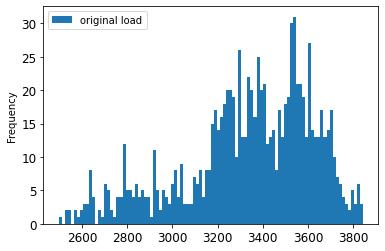

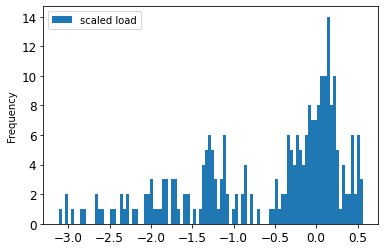

In [19]:
stlf_data[(stlf_data.index >=4993) & (stlf_data.index <=5953)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4993) & (valid.index <=5953)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5700,-2.842488,-1.753346,1.571572,-0.382891,-1.34757,-1.564697,-2.228230,-1.431209,-1.106349,-1.615655,-0.977286,-0.777326,-2.030299,-3.037387
5701,-3.037387,-1.663386,1.470703,-0.382891,-1.34757,-1.564697,-2.454844,-1.486946,-1.100779,-2.047287,-0.867168,-0.762955,-2.196310,-3.116477
5702,-3.116477,-1.573426,1.369834,-0.382891,-1.34757,-1.564697,-2.594730,-1.620715,-1.164833,-2.310611,-0.781826,-0.633616,-2.363560,-3.031738
5703,-3.031738,-1.483466,1.268965,-0.382891,-1.34757,-1.564697,-2.687054,-1.969074,-1.287372,-2.370333,-0.635919,-0.590503,-2.512474,-2.963947
5704,-2.963947,-1.393506,1.168096,-0.236749,-1.34757,-1.564697,-2.804557,-2.211531,-1.421051,-2.318755,-0.567095,-0.527271,-2.643548,-2.794469
5705,-2.794469,-1.303546,1.067227,-0.236749,-1.34757,-1.564697,-2.997599,-2.437267,-1.476750,-2.169448,-0.492764,-0.484158,-2.754800,-2.644763
5706,-2.644763,-1.213586,0.966358,-0.236749,-1.34757,-1.564697,-3.075935,-2.576610,-1.610429,-1.976706,-0.302810,-0.331826,-2.841026,-2.661711
5707,-2.661711,-1.123626,0.865489,-0.236749,-1.34757,-1.564697,-2.992004,-2.668577,-1.958550,-1.840972,-0.286292,-0.280090,-2.897767,-2.622166
5708,-2.622166,-1.033666,0.764620,-0.090608,-1.34757,-1.564697,-2.924859,-2.785625,-2.200843,-1.770391,-0.206456,-0.363442,-2.929482,-2.596745
5709,-2.596745,-0.943706,0.663751,-0.090608,-1.34757,-1.564697,-2.756996,-2.977919,-2.426426,-1.623799,-0.206456,-0.205361,-2.938898,-2.489408


In [21]:
valid_shifted = valid_shifted.interpolate()

In [22]:
valid_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
6890,0.823887,0.602018,-0.236095,0.932383,0.358215,0.639101,0.888414,0.996151,0.887691,0.480072,1.142496,-0.363442,0.983661,0.781517
6891,0.781517,0.346982,0.028411,0.932383,0.358215,0.639101,1.005917,1.160576,0.620334,0.325335,0.955295,-0.446794,0.999519,0.679830
6892,0.679830,0.346982,0.028411,1.078525,0.358215,0.639101,0.944368,1.233035,0.728948,0.167884,0.779105,-0.501403,0.996793,0.436912
6893,0.436912,0.346982,0.028411,1.078525,0.358215,0.639101,0.882818,0.945987,0.898831,0.281901,0.267054,-0.630742,0.957645,0.287206
6894,0.287206,0.276813,0.147972,1.078525,0.358215,0.639101,0.826864,0.893037,1.004660,0.412205,0.638704,-0.426674,0.895948,0.603565
6895,0.603565,0.206644,0.267532,1.078525,0.358215,0.639101,0.784899,1.010085,1.168974,0.504504,0.825905,-0.271468,0.847384,0.708077
6896,0.708077,0.206644,0.267532,1.224666,0.358215,0.639101,0.684181,0.948774,1.241383,0.471928,0.982824,-0.236977,0.801545,0.677006
6897,0.677006,0.206644,0.267532,1.224666,0.358215,0.639101,0.443579,0.887463,0.954531,0.420349,0.974565,-0.369190,0.778502,0.750446
6898,0.750446,0.164813,0.322384,1.224666,0.358215,0.639101,0.295300,0.831726,0.901616,0.401346,0.856188,0.041820,0.766609,0.733499
6899,0.733499,0.122981,0.377237,1.224666,0.358215,0.639101,0.608643,0.789923,1.018585,0.545224,0.985577,0.139542,0.742822,0.733499


In [23]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
5700,-3.037387
5701,-3.116477
5702,-3.031738
5703,-2.963947
5704,-2.794469
...,...
6895,0.708077
6896,0.677006
6897,0.750446
6898,0.733499


In [24]:
X_valid = valid_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5700,-2.842488,-1.753346,1.571572,-0.382891,-1.347570,-1.564697,-2.228230,-1.431209,-1.106349,-1.615655,-0.977286,-0.777326,-2.030299
5701,-3.037387,-1.663386,1.470703,-0.382891,-1.347570,-1.564697,-2.454844,-1.486946,-1.100779,-2.047287,-0.867168,-0.762955,-2.196310
5702,-3.116477,-1.573426,1.369834,-0.382891,-1.347570,-1.564697,-2.594730,-1.620715,-1.164833,-2.310611,-0.781826,-0.633616,-2.363560
5703,-3.031738,-1.483466,1.268965,-0.382891,-1.347570,-1.564697,-2.687054,-1.969074,-1.287372,-2.370333,-0.635919,-0.590503,-2.512474
5704,-2.963947,-1.393506,1.168096,-0.236749,-1.347570,-1.564697,-2.804557,-2.211531,-1.421051,-2.318755,-0.567095,-0.527271,-2.643548
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,0.603565,0.206644,0.267532,1.078525,0.358215,0.639101,0.784899,1.010085,1.168974,0.504504,0.825905,-0.271468,0.847384
6896,0.708077,0.206644,0.267532,1.224666,0.358215,0.639101,0.684181,0.948774,1.241383,0.471928,0.982824,-0.236977,0.801545
6897,0.677006,0.206644,0.267532,1.224666,0.358215,0.639101,0.443579,0.887463,0.954531,0.420349,0.974565,-0.369190,0.778502
6898,0.750446,0.164813,0.322384,1.224666,0.358215,0.639101,0.295300,0.831726,0.901616,0.401346,0.856188,0.041820,0.766609


In [25]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(1200, 13, 1)


In [26]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(64, input_shape=(1,1)))
model.add(Dropout(0.3))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.007)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=12,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
417/417 [==============================] - 4s 9ms/step - loss: 0.2385 - val_loss: 0.1407
Epoch 2/300
417/417 [==============================] - 3s 8ms/step - loss: 0.1581 - val_loss: 0.1887
Epoch 3/300
417/417 [==============================] - 3s 8ms/step - loss: 0.1270 - val_loss: 0.0905
Epoch 4/300
417/417 [==============================] - 3s 8ms/step - loss: 0.1004 - val_loss: 0.0756
Epoch 5/300
417/417 [==============================] - 3s 8ms/step - loss: 0.0910 - val_loss: 0.0827
Epoch 6/300
417/417 [==============================] - 3s 8ms/step - loss: 0.0728 - val_loss: 0.0652
Epoch 7/300
417/417 [==============================] - 3s 8ms/step - loss: 0.0685 - val_loss: 0.0574
Epoch 8/300
417/417 [==============================] - 3s 8ms/step - loss: 0.0690 - val_loss: 0.0542
Epoch 9/300
417/417 [==============================] - 3s 8ms/step - loss: 0.0731 - val_loss: 0.0425
Epoch 10/300
417/417 [==============================] - 3s 8ms/step - loss: 0.0690 - val_lo

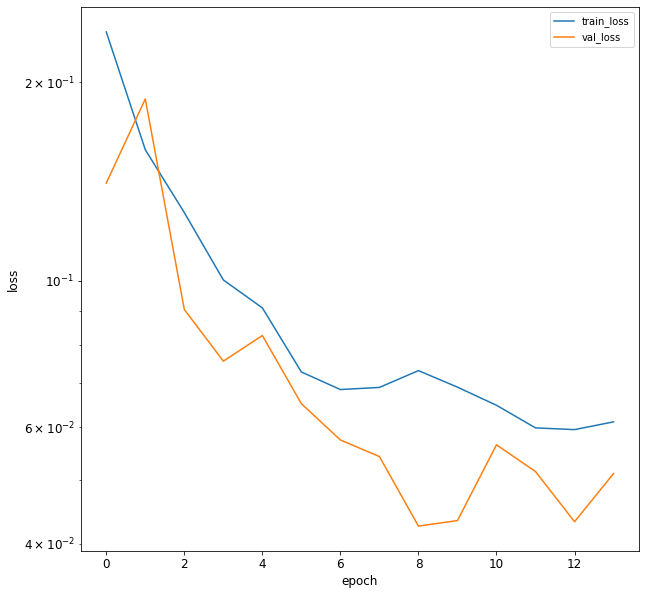

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[stlf_data.index >= 5994][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5994,3767.0,39.072453,37.605445,11.0,2.0,1.0,3698.0,3677.0,3521.0,3260.0,3711.0,3795.0,3692.416667
5995,3753.0,39.142452,37.372050,11.0,2.0,1.0,3700.0,3744.0,3523.0,3270.0,3771.0,3799.0,3711.583333
5996,3732.0,39.142452,37.372050,12.0,2.0,1.0,3728.0,3802.0,3578.0,3259.0,3794.0,3789.0,3724.416667
5997,3743.0,39.142452,37.372050,12.0,2.0,1.0,3742.0,3719.0,3631.0,3255.0,3760.0,3812.0,3733.750000
5998,3694.0,39.397451,36.944630,12.0,2.0,1.0,3767.0,3698.0,3677.0,3293.0,3732.0,3872.0,3735.166667
5999,3668.0,39.652450,36.517210,12.0,2.0,1.0,3753.0,3700.0,3744.0,3373.0,3753.0,3898.0,3728.833333
6000,3752.0,39.652450,36.517210,13.0,2.0,1.0,3732.0,3728.0,3802.0,3390.0,3769.0,3885.0,3724.666667
6001,3777.0,39.652450,36.517210,13.0,2.0,1.0,3743.0,3742.0,3719.0,3360.0,3808.0,3875.0,3729.500000
6002,3787.0,40.427450,34.553190,13.0,2.0,1.0,3694.0,3767.0,3698.0,3443.0,3811.0,3917.0,3736.916667
6003,3808.0,41.202450,32.589170,13.0,2.0,1.0,3668.0,3753.0,3700.0,3452.0,3828.0,3922.0,3745.916667


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2838 entries, 5994 to 8831
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2838 non-null   float64
 1   Temp    2838 non-null   float64
 2   Hum     2838 non-null   float64
 3   A       2838 non-null   float64
 4   B       2838 non-null   float64
 5   C       2838 non-null   float64
 6   D       2838 non-null   float64
 7   E       2838 non-null   float64
 8   F       2838 non-null   float64
 9   G       2838 non-null   float64
 10  H       2838 non-null   float64
 11  I       2838 non-null   float64
 12  J       2838 non-null   float64
dtypes: float64(13)
memory usage: 310.4 KB


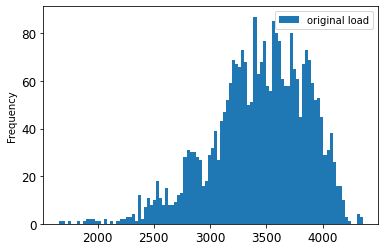

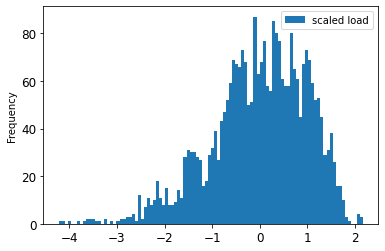

In [33]:
stlf_data[stlf_data.index >= 5994][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5994][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5994,0.774235,2.055301,-2.166301,-0.231364,-0.977174,0.661581,0.611175,0.561679,0.192951,-0.424056,0.616102,0.773040,0.624614,0.741104
5995,0.741104,2.074013,-2.181371,-0.231364,-0.977174,0.661581,0.615908,0.720272,0.197686,-0.400393,0.758476,0.782729,0.671992,0.691407
5996,0.691407,2.074013,-2.181371,-0.086736,-0.977174,0.661581,0.682179,0.857561,0.327903,-0.426422,0.813053,0.758507,0.703715,0.717439
5997,0.717439,2.074013,-2.181371,-0.086736,-0.977174,0.661581,0.715314,0.661095,0.453385,-0.435887,0.732374,0.814217,0.726786,0.601479
5998,0.601479,2.142179,-2.208969,-0.086736,-0.977174,0.661581,0.774484,0.611387,0.562294,-0.345969,0.665933,0.959546,0.730288,0.539949
5999,0.539949,2.210346,-2.236567,-0.086736,-0.977174,0.661581,0.741349,0.616121,0.720923,-0.156667,0.715764,1.022522,0.714633,0.738737
6000,0.738737,2.210346,-2.236567,0.057892,-0.977174,0.661581,0.691646,0.682399,0.858242,-0.116440,0.753730,0.991034,0.704333,0.797901
6001,0.797901,2.210346,-2.236567,0.057892,-0.977174,0.661581,0.717681,0.715537,0.661733,-0.187429,0.846274,0.966813,0.716281,0.821566
6002,0.821566,2.417519,-2.363382,0.057892,-0.977174,0.661581,0.601707,0.774714,0.612014,0.008972,0.853393,1.068543,0.734614,0.871263
6003,0.871263,2.624692,-2.490197,0.057892,-0.977174,0.661581,0.540170,0.741575,0.616749,0.030268,0.893732,1.080654,0.756861,0.970657


In [35]:
test_shifted = test_shifted.interpolate()
test_shifted.tail(5)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
8827,0.861797,-0.321174,0.644778,1.504173,-0.470372,0.661581,0.774484,0.604286,0.391828,0.470395,-0.810016,-0.583368,0.666843,0.752937
8828,0.752937,-0.321174,0.644778,1.648801,-0.470372,0.661581,0.774484,0.542743,0.441547,0.517720,-0.779168,-0.607590,0.694034,0.622778
8829,0.622778,-0.321174,0.644778,1.648801,-0.470372,0.661581,0.757916,0.592451,0.398931,0.505889,-0.798151,-0.539769,0.713603,0.797901
8830,0.797901,-0.297116,0.644778,1.648801,-0.470372,0.661581,0.826554,0.646893,0.441547,0.458563,-0.648658,-0.530081,0.744708,0.897295
8831,0.897295,-0.297116,0.547693,1.648801,-0.470372,0.661581,0.862056,0.774714,0.604911,0.534284,-0.627302,-0.382329,0.770251,0.897295


In [36]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5994,0.741104
5995,0.691407
5996,0.717439
5997,0.601479
5998,0.539949
...,...
8827,0.752937
8828,0.622778
8829,0.797901
8830,0.897295


In [37]:
X_test = test_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5994,0.774235,2.055301,-2.166301,-0.231364,-0.977174,0.661581,0.611175,0.561679,0.192951,-0.424056,0.616102,0.773040,0.624614
5995,0.741104,2.074013,-2.181371,-0.231364,-0.977174,0.661581,0.615908,0.720272,0.197686,-0.400393,0.758476,0.782729,0.671992
5996,0.691407,2.074013,-2.181371,-0.086736,-0.977174,0.661581,0.682179,0.857561,0.327903,-0.426422,0.813053,0.758507,0.703715
5997,0.717439,2.074013,-2.181371,-0.086736,-0.977174,0.661581,0.715314,0.661095,0.453385,-0.435887,0.732374,0.814217,0.726786
5998,0.601479,2.142179,-2.208969,-0.086736,-0.977174,0.661581,0.774484,0.611387,0.562294,-0.345969,0.665933,0.959546,0.730288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,0.861797,-0.321174,0.644778,1.504173,-0.470372,0.661581,0.774484,0.604286,0.391828,0.470395,-0.810016,-0.583368,0.666843
8828,0.752937,-0.321174,0.644778,1.648801,-0.470372,0.661581,0.774484,0.542743,0.441547,0.517720,-0.779168,-0.607590,0.694034
8829,0.622778,-0.321174,0.644778,1.648801,-0.470372,0.661581,0.757916,0.592451,0.398931,0.505889,-0.798151,-0.539769,0.713603
8830,0.797901,-0.297116,0.644778,1.648801,-0.470372,0.661581,0.826554,0.646893,0.441547,0.458563,-0.648658,-0.530081,0.744708


In [38]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2838, 13, 1)

In [39]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2838,13,1)

In [40]:
predictions = model.predict(X_test)
predictions

array([[0.6840576 ],
       [0.65977865],
       [0.6170882 ],
       ...,
       [0.6491039 ],
       [0.8048238 ],
       [0.8861205 ]], dtype=float32)

In [41]:
feature=stlf_data.copy()[stlf_data.index >= 5994][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3439.838795
dtype: float64
Cons    422.634878
dtype: float64


In [42]:
load_mean=3439.838795
load_std=422.634878
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(2838, 1)


In [43]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(2838, 1)


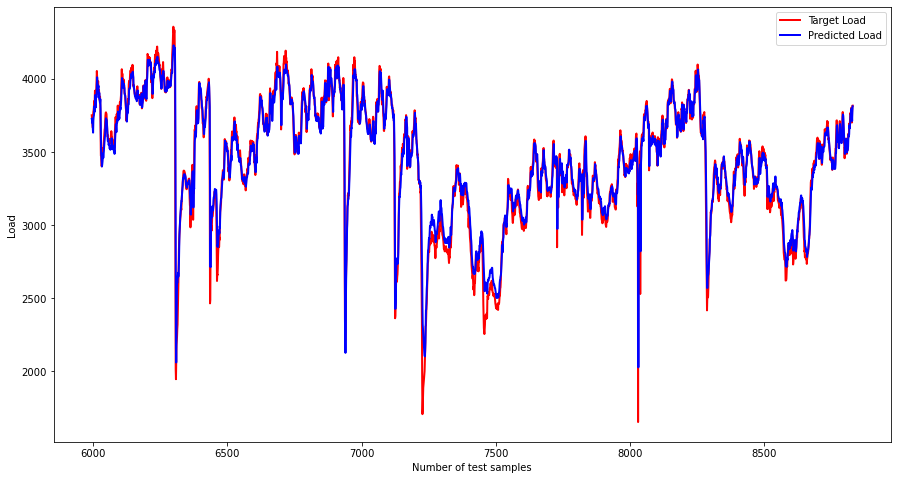

In [44]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.679965706285758


In [46]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1   -0.486908
dtype: float64


In [47]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5994  375206.161143
5995  373105.506839
5996  374206.475590
5997  369303.998241
5998  366704.203977
...             ...
8827  375704.516429
8828  370203.030936
8829  377607.606648
8830  381807.705157
8831  381806.805497

[2838 rows x 1 columns]


In [48]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5994   581.274297
5995   178.680980
5996  1798.742072
5997   315.405286
5998    45.137313
...           ...
8827  1679.265619
8828  3539.757385
8829  3954.720096
8830  1527.341966
8831    22.302763

[2838 rows x 1 columns]
y_t+1    8476.759506
dtype: float64


In [49]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    92.069319
dtype: float64


In [50]:
a=np.array(rescaled_predicted_load)

In [51]:
for i in  range(0,2879):
    b=a[i]
    print(b)

[3728.9456]
[3718.6843]
[3700.6418]
[3711.8044]
[3661.3218]
[3634.2217]
[3716.729]
[3742.351]
[3750.8115]
[3772.269]
[3815.5347]
[3777.4746]
[3824.565]
[3891.5586]
[3834.53]
[3806.6462]
[3886.3545]
[3873.7896]
[3899.5784]
[3949.9954]
[4012.75]
[3983.034]
[3950.6802]
[3955.4575]
[3942.0059]
[3955.1943]
[3874.8188]
[3875.9805]
[3906.9631]
[3871.1047]
[3843.8499]
[3840.2847]
[3863.2556]
[3791.7415]
[3646.6763]
[3493.5752]
[3475.286]
[3429.4495]
[3402.296]
[3414.317]
[3432.3374]
[3460.2212]
[3492.304]
[3461.1265]
[3482.784]
[3505.7825]
[3537.3262]
[3559.2463]
[3585.7637]
[3618.9797]
[3627.9956]
[3676.3423]
[3710.693]
[3732.3547]
[3726.571]
[3722.0103]
[3720.202]
[3673.509]
[3645.8176]
[3606.0483]
[3575.3706]
[3580.2952]
[3585.5369]
[3549.814]
[3556.7957]
[3551.8098]
[3537.4014]
[3523.6592]
[3533.9373]
[3517.952]
[3526.3228]
[3519.65]
[3534.0579]
[3554.049]
[3595.469]
[3568.6714]
[3564.3826]
[3552.4238]
[3534.2524]
[3525.9512]
[3519.143]
[3542.4702]
[3521.2422]
[3500.501]
[3512.838]
[3488.4

[3806.4253]
[3790.1528]
[3856.8242]
[3903.2825]
[3909.874]
[3935.6523]
[3919.5408]
[3932.8953]
[3936.6555]
[3970.0898]
[4028.6294]
[3994.8342]
[3981.9106]
[3971.9119]
[3984.3113]
[3976.5999]
[3954.9307]
[3915.5862]
[3885.6177]
[3870.6077]
[3876.8499]
[3862.9824]
[3818.7505]
[3811.17]
[3748.66]
[3755.8035]
[3730.6382]
[3715.213]
[3720.6848]
[3714.328]
[3716.2192]
[3715.3992]
[3744.566]
[3741.5518]
[3719.699]
[3740.0713]
[3729.9604]
[3700.5793]
[3684.798]
[3672.6753]
[3656.7644]
[3675.1865]
[3639.5696]
[3655.0378]
[3627.8416]
[3677.4834]
[3736.2842]
[3821.047]
[3846.8684]
[3818.4]
[3757.4434]
[3661.4917]
[3684.5603]
[3675.0627]
[3781.0967]
[3846.3704]
[3865.3535]
[3824.4841]
[3856.4705]
[3903.3618]
[3946.9995]
[3974.519]
[3850.223]
[3855.4917]
[3864.0317]
[3850.9788]
[3865.8223]
[3887.1365]
[3893.5288]
[3960.5728]
[3988.9456]
[3982.2363]
[4060.033]
[4084.8975]
[3966.1265]
[3880.896]
[3916.4207]
[3969.131]
[3999.8855]
[4046.7634]
[4066.6484]
[3987.9854]
[3973.3728]
[4008.6968]
[3991.111]


[2604.3867]
[2623.701]
[2624.5967]
[2646.6287]
[2654.5173]
[2668.7393]
[2702.2666]
[2747.1746]
[2787.5027]
[2837.9753]
[2865.7734]
[2816.6118]
[2885.1755]
[2907.394]
[2921.649]
[2998.5256]
[3015.009]
[3020.0916]
[3021.3723]
[3041.3674]
[3067.4797]
[3065.651]
[3036.8247]
[3030.5537]
[2992.1704]
[3010.3005]
[2989.2083]
[3049.704]
[3083.2112]
[3105.7202]
[3123.1858]
[3170.6033]
[3272.5378]
[3275.8154]
[3262.9905]
[3218.977]
[3237.997]
[3256.913]
[3248.9683]
[3233.1567]
[3236.7427]
[3238.899]
[3221.731]
[3249.3596]
[3251.2324]
[3233.2458]
[3191.6724]
[3158.7056]
[3146.3577]
[3111.6978]
[3095.1494]
[3108.602]
[3150.2786]
[3155.0298]
[3125.2832]
[3139.868]
[3128.7463]
[3120.2415]
[3123.9683]
[3163.3943]
[3195.6072]
[3198.6382]
[3205.7031]
[3186.839]
[3179.4973]
[3185.9875]
[3211.1914]
[3236.265]
[3237.4514]
[3238.9275]
[3208.524]
[3210.2332]
[3192.8115]
[3193.9553]
[3165.608]
[3161.0803]
[3139.133]
[3141.7349]
[3116.7856]
[3110.2642]
[3091.9692]
[3074.4624]
[3065.664]
[3043.26]
[3030.9036]
[

[3468.0234]
[3456.6462]
[3428.3752]
[3469.5737]
[3464.7227]
[3419.8079]
[3368.8896]
[3330.4238]
[3323.4446]
[3314.9675]
[3275.7876]
[3348.393]
[3333.6301]
[3326.8242]
[3329.134]
[3397.0535]
[3405.613]
[3419.4995]
[3439.8464]
[3528.3125]
[3510.852]
[3483.116]
[3485.0945]
[3491.1233]
[3493.1506]
[3520.5486]
[3524.4377]
[3574.2073]
[3569.5269]
[3529.1243]
[3532.5884]
[3513.6064]
[3510.841]
[3492.9878]
[3478.751]
[3448.0193]
[3426.883]
[3405.4797]
[3397.042]
[3388.0977]
[3374.521]
[3353.938]
[3335.3333]
[3327.924]
[3322.0024]
[3278.726]
[3322.2622]
[3320.4497]
[3328.17]
[3330.444]
[3294.4443]
[3310.3271]
[3284.7397]
[3298.4124]
[3281.2297]
[3307.2217]
[3317.7651]
[3296.3062]
[3288.718]
[3306.9426]
[3305.651]
[3306.9397]
[3350.6172]
[3414.5574]
[3427.978]
[3461.2864]
[3427.5068]
[3350.5417]
[3357.7378]
[3395.4087]
[3399.7117]
[3406.1199]
[3422.048]
[3428.8262]
[3435.2239]
[3485.5017]
[3485.6895]
[3497.1118]
[3488.0415]
[3465.6753]
[3490.9685]
[3490.4993]
[3448.1875]
[3462.2148]
[3441.594]
[

IndexError: index 2838 is out of bounds for axis 0 with size 2838